In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import os

%matplotlib inline

In [2]:
current_directory = os.getcwd()
file_path = current_directory + '/csv/anonymous_orders.csv'

In [3]:
df_orders = pd.read_csv(file_path)

In [4]:
df_orders.shape

(2295, 25)

In [5]:
df_orders = df_orders.drop(columns=['Unnamed: 0'])

In [6]:
df_orders['total'] = df_orders['total'] / 100
df_orders['subtotal'] = df_orders['subtotal'] / 100

In [7]:
df_orders.head()

,_id,shippingStatus,subtotal,total,products,shippingTotal,user,gatewayStatus,createdAt,updatedAt,...,coupon.code,coupon.seller,coupon.discount,coupon.couponType,weather.main.temp,createdAt Timezone,Sale Hour,weekday-number,weekday,day_month
0,5f7e26f9ca1cb600176e5f01,done,242.0,242.0,[{'selectedVariation': {'color': {'name': 'Pre...,0,5f10b182cdeda100176341bb,paid,2020-10-07 20:37:13.589,2021-09-17 16:50:53.223,...,NaN,NaN,NaN,NaN,NaN,2020-10-07 17:37:13.589,17,2,Quarta,7
1,5f84a3c0b47b60001755f19c,done,178.0,160.2,[{'selectedVariation': {'color': {'name': 'Azu...,0,5f243b83736534001788d9a8,paid,2020-10-12 18:43:12.876,2021-09-17 16:50:53.223,...,INFANCIAENIKA,5caf95599eebb200176e2999,1780.0,NaN,NaN,2020-10-12 15:43:12.876,15,0,Segunda,12
2,5f9c7173c289e10017f914e7,done,196.0,196.0,[{'selectedVariation': {'color': {'hex': '#000...,0,5ea082b7e35e250017b25257,paid,2020-10-30 20:02:59.238,2021-09-17 16:50:53.224,...,NaN,NaN,NaN,NaN,NaN,2020-10-30 17:02:59.238,17,4,Sexta,30
3,5fa68aff7848ea001749824c,done,170.0,170.0,[{'selectedVariation': {'color': {'hex': '#000...,0,5e22282e36443600170723ab,paid,2020-11-07 11:54:39.737,2021-09-17 16:50:53.224,...,NaN,NaN,NaN,NaN,NaN,2020-11-07 08:54:39.737,8,5,Sábado,7
4,5f96f40689f4fa0017074848,done,178.0,178.0,[{'selectedVariation': {'color': {'name': 'Mar...,0,5efa75641e10ec001726c78d,paid,2020-10-26 16:06:30.227,2021-09-17 16:50:53.224,...,NaN,NaN,NaN,NaN,NaN,2020-10-26 13:06:30.227,13,0,Segunda,26


Text(0, 0.5, 'Total do pedido em R$')

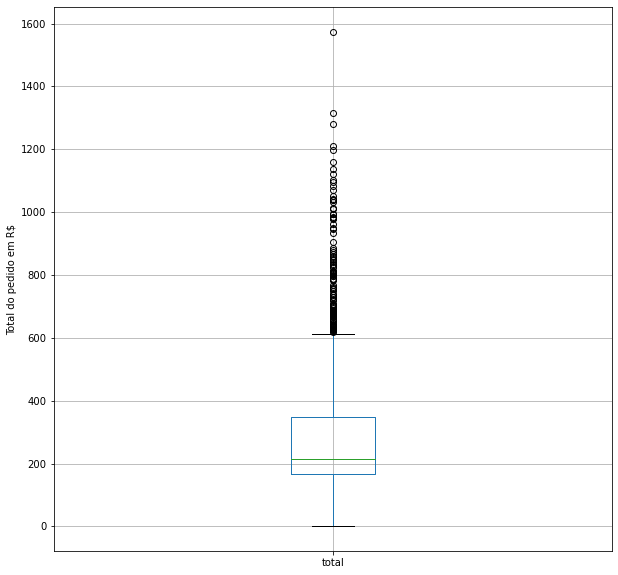

In [8]:
boxplot = df_orders.boxplot(figsize=(10,10), column=['total'])
boxplot.set_ylabel('Total do pedido em R$')

In [9]:
## Evolução dos Pedidos

In [10]:
df_orders['createdAt'] = pd.to_datetime(df_orders['createdAt'])
df_orders['updatedAt'] = pd.to_datetime(df_orders['updatedAt'])
df_orders['createdAt Timezone'] = pd.to_datetime(df_orders['createdAt Timezone'])


In [11]:
df_orders.index = df_orders["createdAt"]

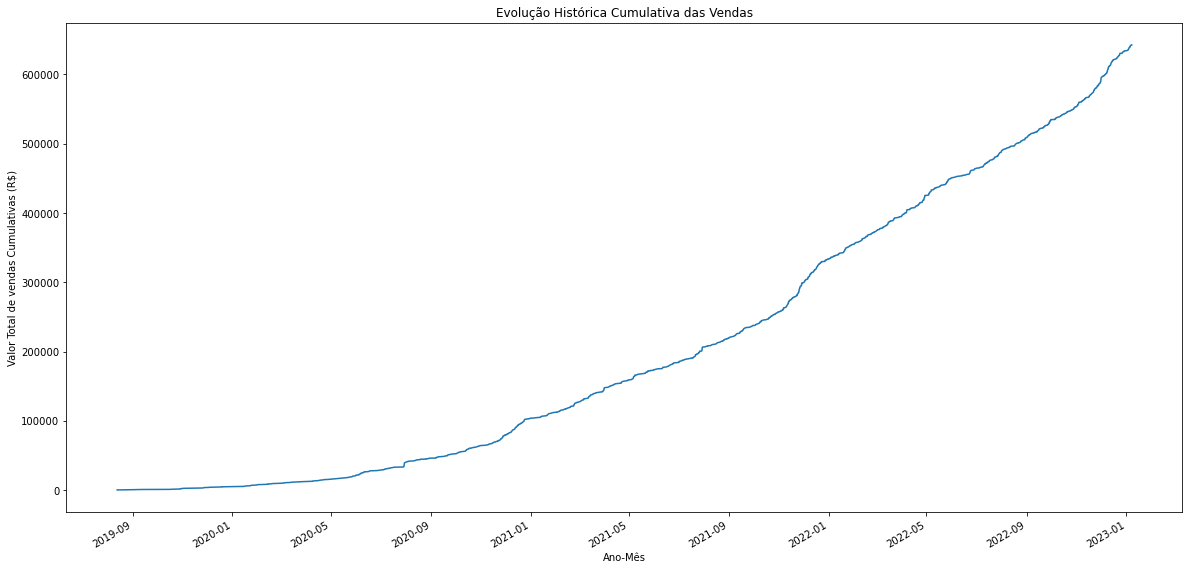

In [12]:
plt.figure(figsize=(20,10))
df_orders["total"].sort_index().cumsum().plot()

plt.title("Evolução Histórica Cumulativa das Vendas")
plt.ylabel('Valor Total de vendas Cumulativas (R$)')
plt.xlabel('Ano-Mês')
plt.show()

In [13]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2295 entries, 2020-10-07 20:37:13.589000 to 2023-01-07 13:59:33.974000
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   _id                        2295 non-null   object        
 1   shippingStatus             2295 non-null   object        
 2   subtotal                   2295 non-null   float64       
 3   total                      2295 non-null   float64       
 4   products                   2295 non-null   object        
 5   shippingTotal              2295 non-null   int64         
 6   user                       2295 non-null   object        
 7   gatewayStatus              2295 non-null   object        
 8   createdAt                  2295 non-null   datetime64[ns]
 9   updatedAt                  2295 non-null   datetime64[ns]
 10  shippingInfo.state         2295 non-null   object        
 11  shippingInfo.city  

In [14]:
df_orders["Month/Year"] = df_orders["createdAt Timezone"].dt.strftime("%Y/%m")

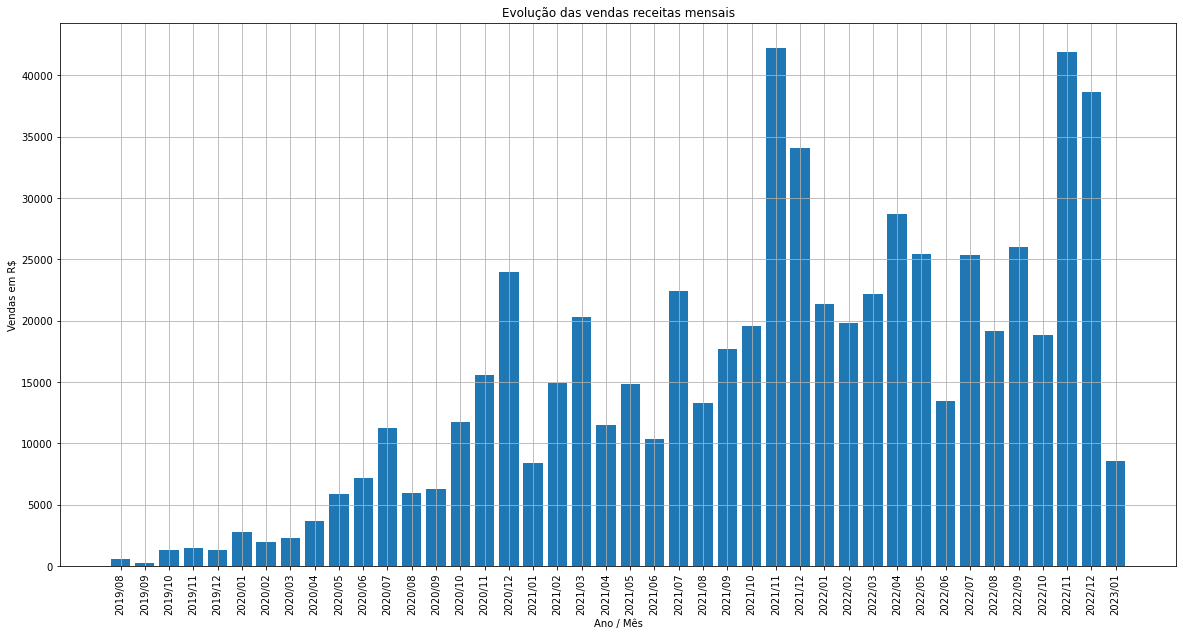

In [15]:
mont_year_count = df_orders.groupby("Month/Year").sum()
# months = range(1,13)
# hour_count = ordersFrame.groupby("Sale Hour").count()
# hour_count = ordersFrame.groupby("Sale Hour").sum()

# Generate data for plots 
# cities = df["City"].unique()
hours = [hour for hour, df1 in df_orders.groupby("Month/Year")]

# months2 = df["Month"].unique()
plt.figure(figsize=(20,10))
plt.bar(hours, mont_year_count["total"])
plt.xticks(hours, rotation="vertical")
plt.ylabel('Vendas em R$')
plt.xlabel('Ano / Mês')
plt.title('Evolução das vendas receitas mensais')
plt.grid()
plt.show()

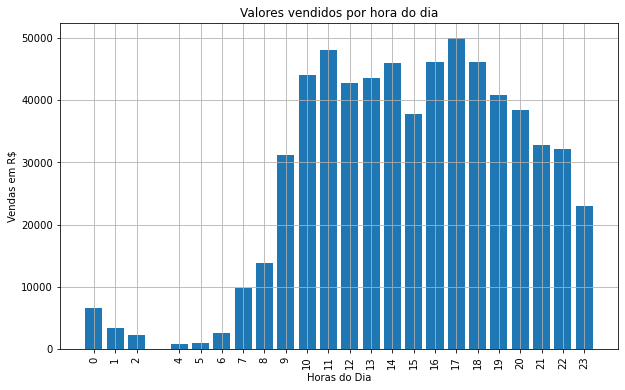

In [16]:
hour_count = df_orders.groupby("Sale Hour").sum()
# months = range(1,13)
# hour_count = ordersFrame.groupby("Sale Hour").count()
# hour_count = ordersFrame.groupby("Sale Hour").sum()

# Generate data for plots 
# cities = df["City"].unique()
hours = [hour for hour, df1 in df_orders.groupby("Sale Hour")]

# months2 = df["Month"].unique()
plt.figure(figsize=(10,6))
plt.bar(hours, hour_count["total"])
plt.xticks(hours, rotation="vertical")
plt.ylabel('Vendas em R$')
plt.xlabel('Horas do Dia')
plt.title('Valores vendidos por hora do dia')
plt.grid()
plt.show()

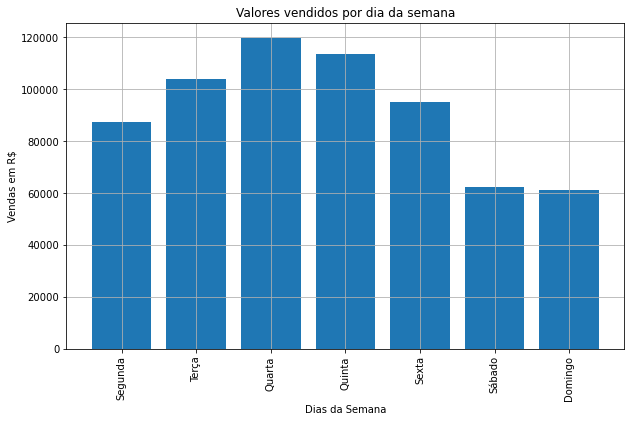

In [17]:
day_count = df_orders.groupby("weekday").sum()
day_count = day_count.reindex(index = ['Segunda', "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"])
# day_count
days = day_count.index
# days = [weekday for weekday, df1 in ordersFrame.groupby("weekday")]


# months2 = df["Month"].unique()
plt.figure(figsize=(10,6))
plt.bar(days, day_count["total"])
plt.xticks(days, rotation="vertical")
plt.ylabel('Vendas em R$')
plt.xlabel('Dias da Semana')
plt.title('Valores vendidos por dia da semana')
plt.grid()
plt.show()

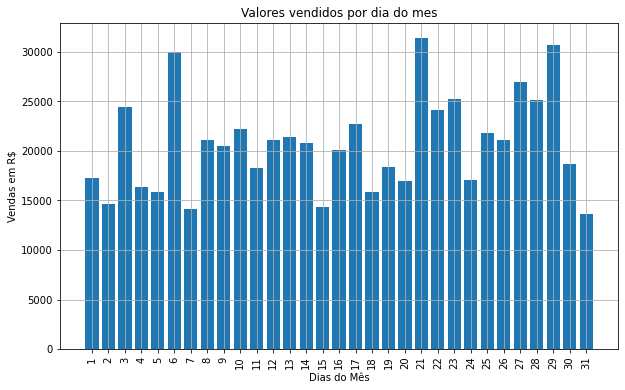

In [18]:
day_month_count = df_orders.groupby("day_month").sum()
days_month = [weekday for weekday, df1 in df_orders.groupby("day_month")]

# months2 = df["Month"].unique()
plt.figure(figsize=(10,6))
plt.bar(days_month, day_month_count["total"])
plt.xticks(days_month, rotation="vertical")
plt.ylabel('Vendas em R$')
plt.xlabel('Dias do Mês')
plt.title('Valores vendidos por dia do mes')
plt.grid()
plt.show()

In [19]:
df_products = pd.read_csv('csv/anonymous_products.csv')

In [20]:
df_products.shape

(3510, 18)

In [21]:
df_products = df_products.drop(columns=['quantity'])

In [22]:
df_products = df_products.drop(columns=['selectedVariation.tecidos.tecidosImages'])

In [23]:
df_products = df_products.drop(columns=['selectedVariation.stockTecidos'])

In [24]:
df_products = df_products.drop(columns=['associatedProduct'])

In [25]:
df_products = df_products.drop(columns=['selectedVariation.images'])

In [26]:
df_products.tail()

,Unnamed: 0,slug,_id,name,price,sellerId,selectedVariation.color.name,selectedVariation.color.hex,selectedVariation._id,selectedVariation.size,selectedVariation.tecidos._id,selectedVariation.tecidos.name,createdAt
3505,3505,vestido-macaquinho-viscose,61a60ee569e2ca001866dccd,Vestido Macaquinho Viscose,23700,5caf95599eebb200176e2999,Coral,#FFBD9D,63b58740be233400160fff43,GG,62fa751f70cb9e0016f9dc05,Viscose Coral,2023-01-06 17:40:52.597000+00:00
3506,3506,calca-comphy-linho,5e1f0f00d0ae4900176fb3d4,Calça Comphy Linho,19800,5caf95599eebb200176e2999,Natural,#DCD2BE,62190f3cfd596100184158a3,PP,5fc7ab23588c8d00175e065a,Linho Natural,2023-01-07 01:16:48.321000+00:00
3507,3507,macacao-meka,6197ec077f95950018234fd1,Macacão Meka,31900,5caf95599eebb200176e2999,Preto,#000000,619d1421dffc3a0018a7d84c,PP,5fca3d2de8b93400179d1c95,Linho Preto,2023-01-07 01:16:48.321000+00:00
3508,3508,macacao-chiara-em-linho,614c6565b7ba7700185f4bab,Macacão Chiara em Linho,25800,5caf95599eebb200176e2999,Branco,#E8E8E8,618d87572a50430018e2bd4e,PP,5fc7abfc588c8d00175e065b,Linho Branco,2023-01-07 01:16:48.321000+00:00
3509,3509,macacao-lua,633b29e59b08d3001605b1c7,Macacão Lua,19800,5caf95599eebb200176e2999,Estampa folhagem barrado,#538247,633b29e59b08d3001605b1c8,P,6303a7b8991e430016a8d872,Viscose Estampa Folhagem Barrado,2023-01-07 13:59:33.974000+00:00


In [27]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      3510 non-null   int64 
 1   slug                            3510 non-null   object
 2   _id                             3510 non-null   object
 3   name                            3510 non-null   object
 4   price                           3510 non-null   int64 
 5   sellerId                        3505 non-null   object
 6   selectedVariation.color.name    3510 non-null   object
 7   selectedVariation.color.hex     3510 non-null   object
 8   selectedVariation._id           3510 non-null   object
 9   selectedVariation.size          3510 non-null   object
 10  selectedVariation.tecidos._id   1503 non-null   object
 11  selectedVariation.tecidos.name  1439 non-null   object
 12  createdAt                       3510 non-null   

In [28]:
df_products['selectedVariation.color.name'] = df_products['selectedVariation.color.name'].str.lower()

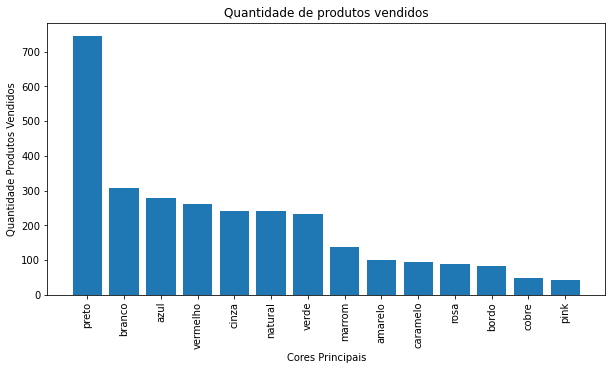

In [29]:
color_values_sold = df_products['selectedVariation.color.name'].value_counts()
color_values_sold = color_values_sold.where(color_values_sold > 40).dropna()
color_values_sold = color_values_sold.convert_dtypes()
color_values_sold

color_sold = color_values_sold.keys()

plt.figure(figsize=(10,5))
plt.bar(color_sold, color_values_sold)
plt.xticks(color_sold, rotation="vertical")
plt.ylabel('Quantidade Produtos Vendidos')
plt.xlabel('Cores Principais')
plt.title('Quantidade de produtos vendidos')
plt.show()